In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import numpy as np

x = np.array([0,1,2,3,4])
y = x*2 + 1 # 가중치 2, 절편 1로 초기 설정

model = Sequential()
model.add(Dense(1,input_shape=(1,))) # 출력 노드 1, 입력 노드 1
model.compile(optimizer='sgd', loss='mse') # 확률적경사하강법sgd
model.fit(x[:2].reshape(-1,1), y[:2].reshape(-1,1), epochs=500, verbose=1)

In [ ]:
mse = model.evaluate(x[2:], y[2:])
print(mse)
print('실제값: ',y[2:])
print('예측값: ',model.predict(x[2:]).flatten()) # 원래 2차원 배열로 나오는 결과를 flatten()을 통해 1차원 배열로 바꿔줌

In [ ]:
# mnist 손글씨 이미지 분류

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 이미지이다보니 픽셀화되면서 0에서 255의 값이 나오는데, 
# 이때 가중치가 붙는 것을 방지하기 위해 255로 나눔으로써 0에서 1 사이의 값이 나오도록 함
X_train = X_train.reshape(60000, 784).astype('float32')/255.0
X_test = X_test.reshape(10000, 784).astype('float32')/255.0

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train[:100], y_train[:100])

print(model.score(X_train[:100],y_train[:100]))
print(model.score(X_test[:100], y_test[:100]))

In [ ]:
import pickle

pickle.dump(model, open('/Users/ian/Desktop/Study/data/mnist/mnist_logit.model', 'wb'))

In [ ]:
model = pickle.load(open("/Users/ian/Desktop/Study/data/mnist/mnist_logit.model", "rb"))

pred = model.predict(X_test[:10])
print(pred[:10])
print(y_test[:10])

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

In [ ]:
# 89페이지로~~~~~~~~~~~

In [ ]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from keras.layers import Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train[:5])

In [ ]:
x_val = x_train[:12600]
x_train = x_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]

In [ ]:
model = Sequential()
model.add(Dense(units=512, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

In [ ]:
import numpy as np

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print('loss_and_metrics : '+str(loss_and_metrics))

In [ ]:
model.save("/Users/ian/Desktop/Study/data/mnist")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from numpy import argmax

xhat_idx = np.random.choice(x_test.shape[0],50)
xhat = x_test[xhat_idx]
model = load_model("/Users/ian/Desktop/Study/data/mnist")
yhat = model.predict(xhat)

for i in range(10):
    print("실제값: ",argmax(y_test[xhat_idx[i]]),', 예측값: ',np.argmax(yhat[i]))

In [ ]:
# 당뇨병 데이터셋

In [1]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/pima/data.csv")

train_cols = df.columns[:8]
X = df[train_cols]
y = df["outcome"]

In [2]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["outcome"])
df_samp = pd.concat([X_samp,y_samp],axis=1)

X = df_samp[train_cols]
y = df_samp["outcome"]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [4]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 이진분류라서 시그모이드로 출력
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

2021-12-24 15:34:56.179092: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pd.DataFrame(X_train_scaled).boxplot()

In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=2)
# validation_split은 학습용 데이터에서도 validation 용으로 20% 남겨둔다는 것
hist = model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
11/11 [==============================] - 1s 21ms/step - loss: 0.2275 - accuracy: 0.6725 - val_loss: 0.2160 - val_accuracy: 0.6163
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.7398 - val_loss: 0.2073 - val_accuracy: 0.6279
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1661 - accuracy: 0.7602 - val_loss: 0.2063 - val_accuracy: 0.6744
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1557 - accuracy: 0.7924 - val_loss: 0.2117 - val_accuracy: 0.6628
Epoch 5/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1504 - accuracy: 0.7778 - val_loss: 0.2127 - val_accuracy: 0.6628


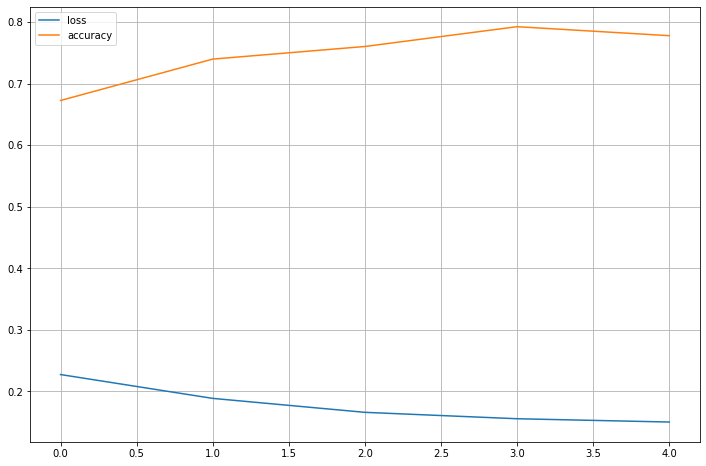

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [9]:
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))

pred = model.predict(X_test_scaled)

14/14 [==============================] - 0s 1ms/step - loss: 0.1584 - accuracy: 0.7710
accuracy: 77.10%
4/4 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.7593
accuracy: 75.93%


In [10]:
import numpy as np

pred = model.predict(X_test_scaled)
np.argmax(pred[:5],axis=1)

array([0, 0, 0, 0, 0])